#                                              PROJECT "X"

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import pprint

###### reading dataset

In [2]:
df  = pd.read_csv('merged.csv')

/home/shuja1497/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,2,3,4,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(5)

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
0,BitTorrent,391223,4114484,7322,5650,L2R,"F,P,A","F,P,A",192.168.2.107,tcp_ip,1989,80.246.149.72,6880,2010-06-14T21:54:57,2010-06-15T01:43:38,Normal
1,Unknown_UDP,236345,5324121,4282,3378,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,96.238.239.35,24457,2010-06-14T21:54:58,2010-06-15T00:52:01,Normal
2,Unknown_UDP,410420,11797592,9416,5791,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,220.126.251.32,27295,2010-06-14T21:55:15,2010-06-15T01:54:44,Normal
3,BitTorrent,127588,2949293,2249,1853,L2R,"P,A","F,R,P,A",192.168.2.107,tcp_ip,2048,92.126.24.44,44817,2010-06-14T21:56:24,2010-06-15T00:53:07,Normal
4,Unknown_UDP,389781,11382564,8837,5531,L2R,NaN,NaN,192.168.2.107,udp_ip,58040,67.173.154.16,53341,2010-06-14T21:57:08,2010-06-15T01:54:44,Normal


In [4]:
import networkx as nx

###### removing null values

In [5]:
df_new  = df.dropna()

In [6]:
df_new.isnull().sum()

appName                           0
totalSourceBytes                  0
totalDestinationBytes             0
totalDestinationPackets           0
totalSourcePackets                0
direction                         0
sourceTCPFlagsDescription         0
destinationTCPFlagsDescription    0
source                            0
protocolName                      0
sourcePort                        0
destination                       0
destinationPort                   0
startDateTime                     0
stopDateTime                      0
Tag                               0
dtype: int64

In [7]:
df_new = shuffle(df_new)

In [8]:
df_new = df_new.reset_index(drop=True)
df_new.head(5)

,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Tag
0,HTTPImageTransfer,494,3194,6,6,L2R,"F,S,P,A","F,S,P,A",192.168.4.118,tcp_ip,4114,203.73.24.75,80,2010-06-15T20:03:02,2010-06-15T20:03:03,Normal
1,HTTPWeb,18021,706193,504,268,L2R,"S,P,A","F,S,P,A",192.168.2.108,tcp_ip,3453,68.178.178.33,80,2010-06-15T02:00:20,2010-06-15T02:00:32,Normal
2,HTTPWeb,9706,163972,210,98,L2L,"F,S,P,A","F,S,P,A",192.168.4.120,tcp_ip,2324,192.168.5.122,80,2010-06-15T17:04:11,2010-06-15T17:04:13,Attack
3,HTTPImageTransfer,666,12061,11,9,L2R,"F,S,P,A","F,S,P,A",192.168.4.118,tcp_ip,4485,203.73.24.75,80,2010-06-15T14:14:08,2010-06-15T14:14:13,Normal
4,SecureWeb,1173,8042,12,12,L2R,"S,P,A","S,P,A",192.168.1.103,tcp_ip,2433,74.125.93.115,443,2010-06-15T12:54:35,2010-06-15T12:55:07,Normal


### using destIP and sourceIP

In [9]:
c = 0
source_dict = {}
dict_for_list = {}
dest_list = []
for ix in xrange(len(df_new)):
    source = "S("+str(df_new['source'][c])+")"
    #print df['destination'][c]
    #print source
    if source not in source_dict:
        l = []
        dest = "D("+str(df_new['destination'][c])+")"
        l.append(dest)
        dict_for_list[source] = l
        source_dict[source] = dict_for_list[source]
    else:
        dest_list = dict_for_list[source]
        if df['destination'][c] not in dest_list:
            dest = "D("+str(df_new['destination'][c])+")"
            dest_list.append(dest)
        source_dict[source] = dest_list
    c += 1 
    if c >500:
        break
#pprint.pprint(source_dict)  
print "done"

done


In [10]:
print "unique  sources are :", df_new['source'].nunique()

unique  sources are : 120


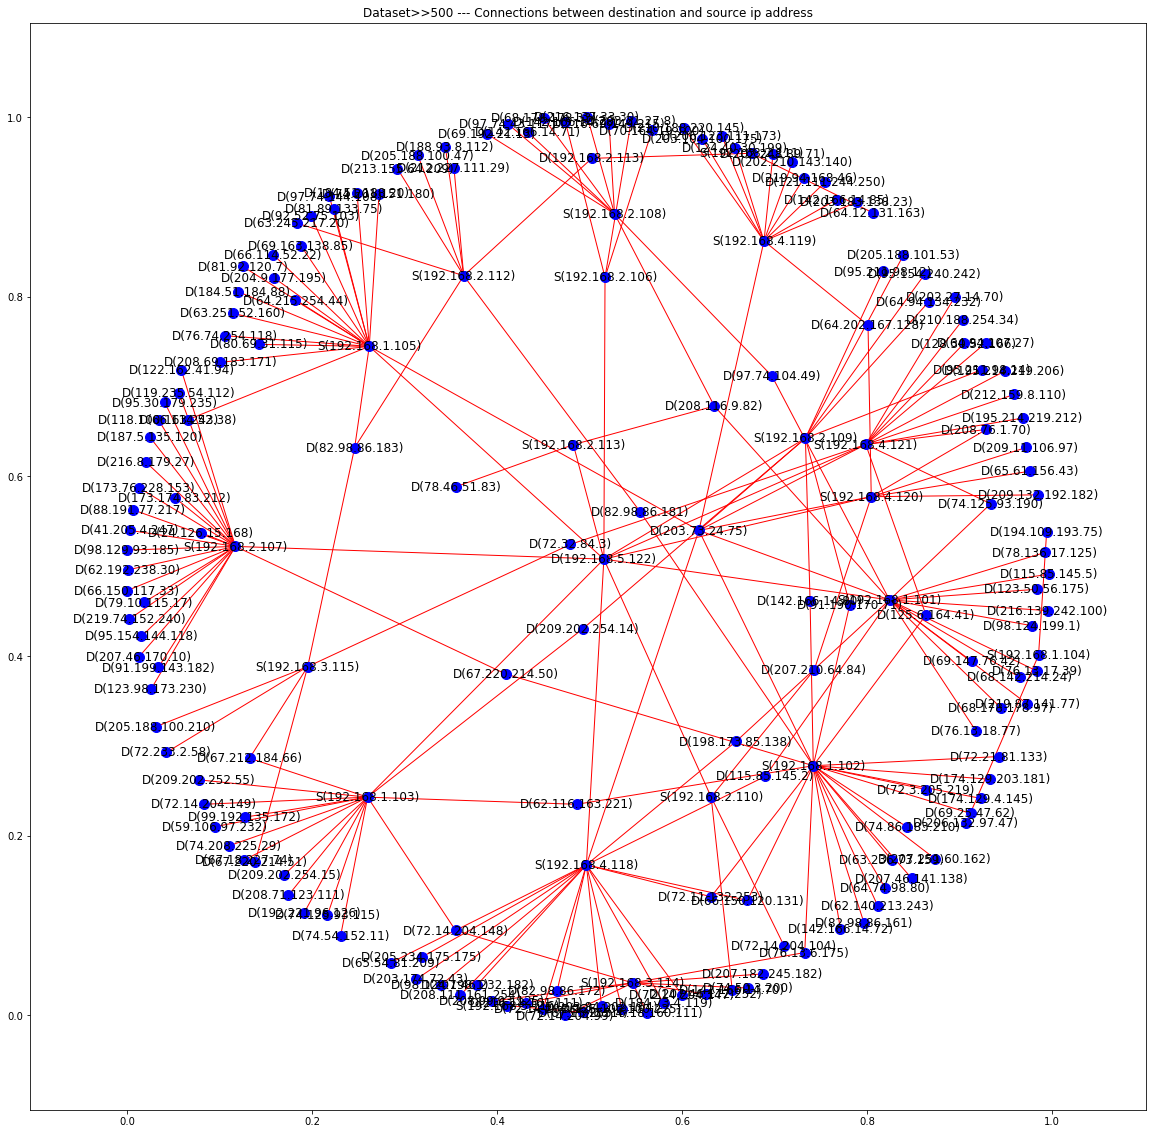

In [15]:
import networkx as nx
import pylab as plt
plt.figure(figsize=(20,20))
h = nx.Graph(source_dict)
pos = nx.layout.fruchterman_reingold_layout(h)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',edge_color='red',node_size=100)
plt.title("Dataset>>500 --- Connections between destination and source ip address")
plt.savefig("one.png")
plt.show(h)
#print h.edges()
plt.close()



### using port numbers 

###### S-SourceIP     D-DestIP      SP-SourcePort    DP-DestPort      

###### Dataset -- 500

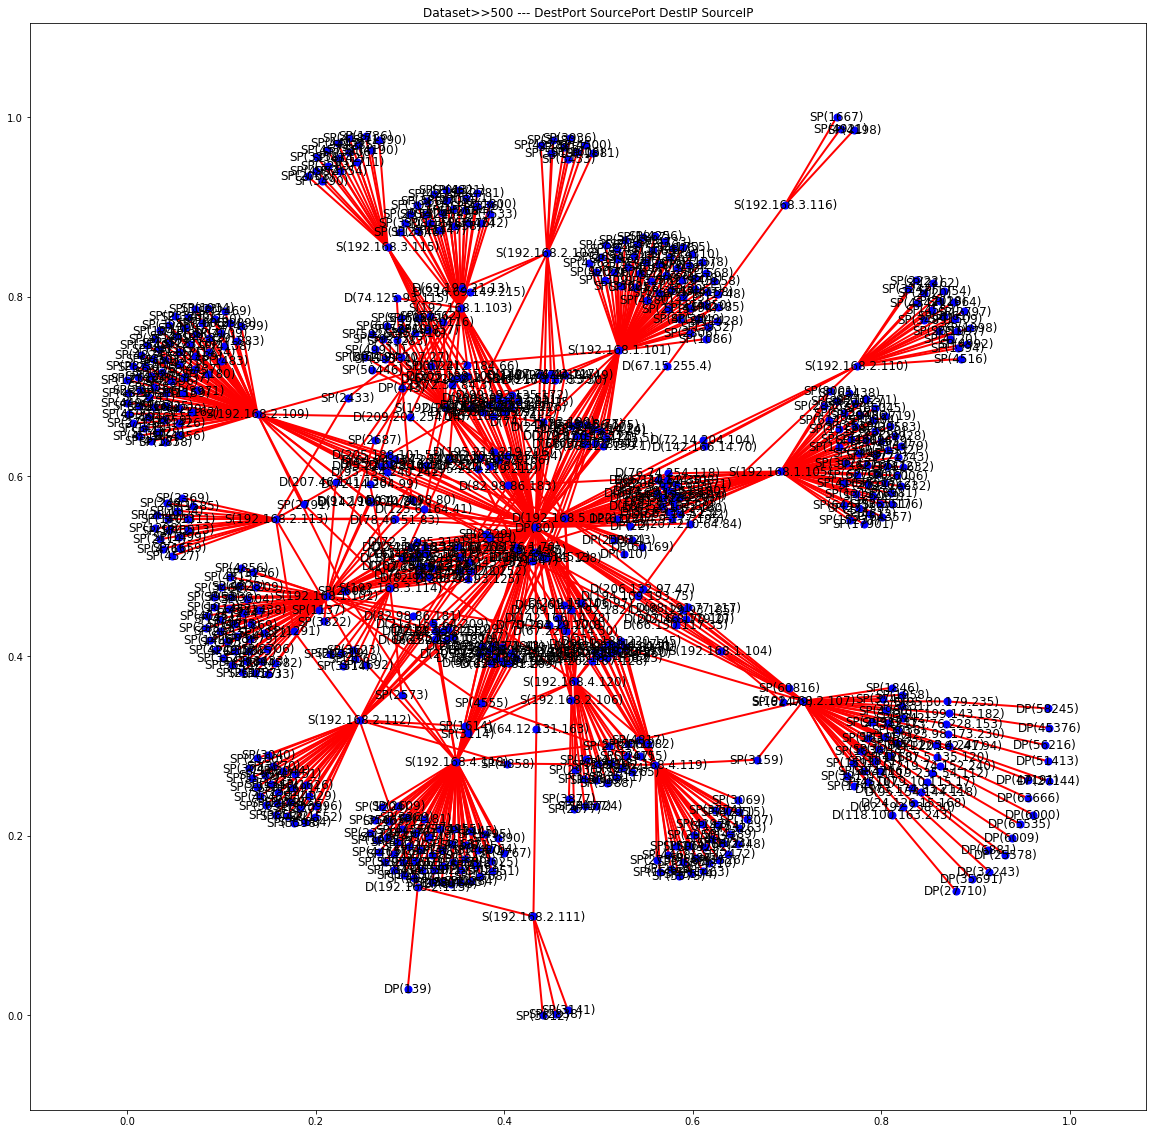

In [25]:
import networkx as nx
import pylab as plt
h = nx.Graph()
for ix in xrange(500):
    h.add_edge("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")",width =2)
    h.add_edge("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")",width=2)
    h.add_edge("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")",width=400)

plt.figure(figsize=(20,20))
pos = nx.layout.fruchterman_reingold_layout(h)
#nx.draw_networkx(h, pos)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',edge_color='red',node_size=50,width=2)
plt.title("Dataset>>500 --- DestPort SourcePort DestIP SourceIP")
plt.savefig("two.png")
plt.show(h)

###### dataset - 100

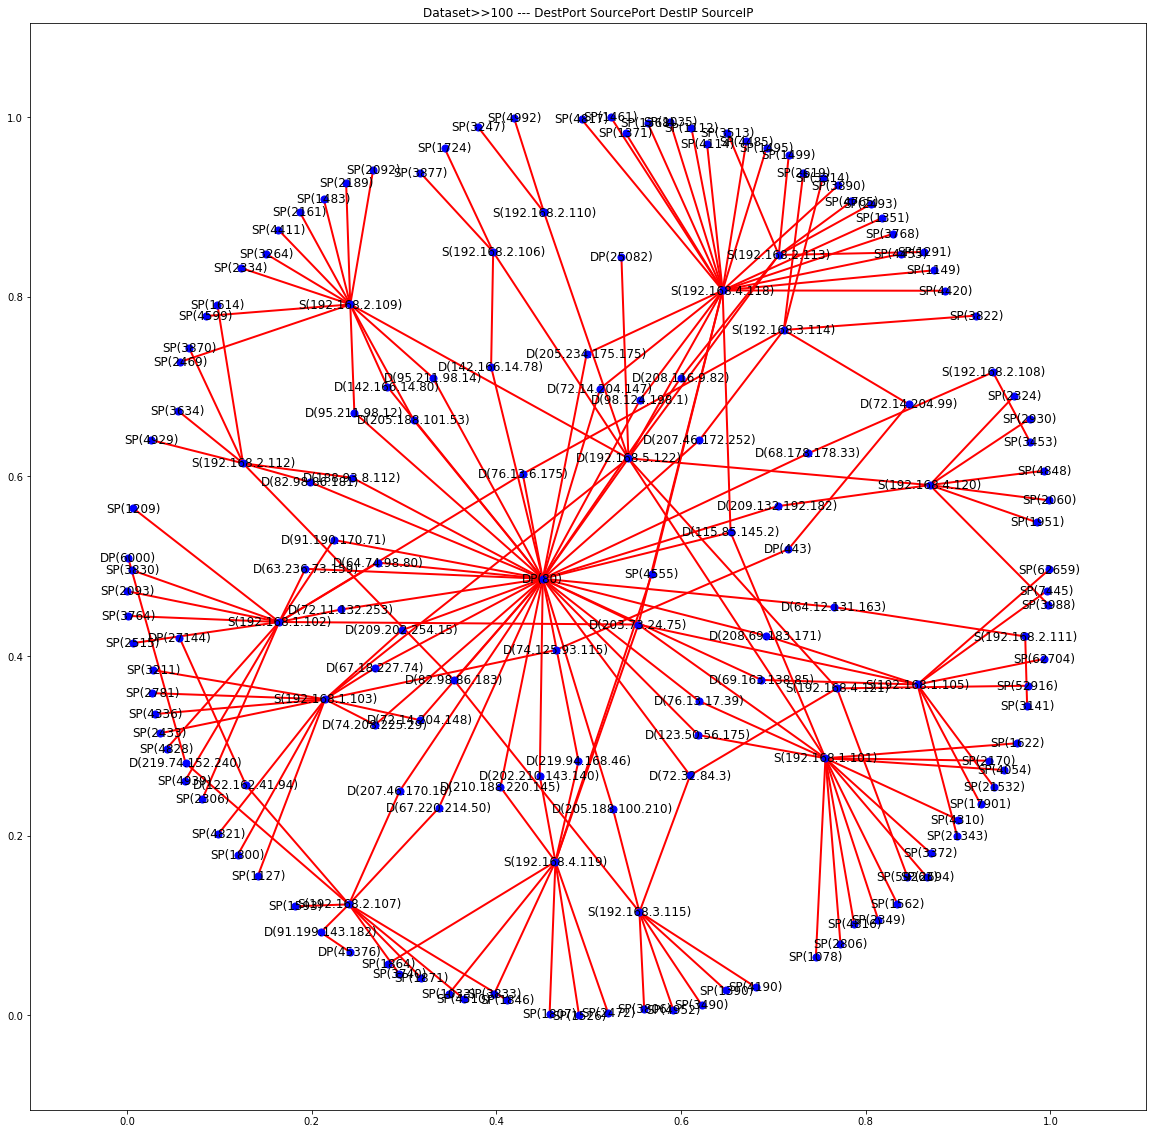

In [26]:
import networkx as nx
import pylab as plt
h = nx.Graph()
for ix in xrange(100):
    h.add_edge("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")",width =2)
    h.add_edge("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")",width=2)
    h.add_edge("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")",width=400)

plt.figure(figsize=(20,20))
pos = nx.layout.fruchterman_reingold_layout(h)
#nx.draw_networkx(h, pos)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',edge_color='red',node_size=50,width=2)
plt.title("Dataset>>100 --- DestPort SourcePort DestIP SourceIP")
plt.savefig("three.png")
plt.show(h)

### Digraph

######  creating color tuple

In [43]:
import networkx as nx
import pylab as plt
h = nx.DiGraph()
i = nx.DiGraph()
j = nx.DiGraph()

l1 = []
l2 = []
l3 = []
for ix in xrange(50):
    h.add_edge("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")")
    l1.append(("S("+str(df_new['source'][ix])+")","D("+str(df_new['destination'][ix])+")"))
    
    h.add_edge("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")")
    l2.append(("D("+str(df_new['destination'][ix])+")" ,"DP("+str(df_new['destinationPort'][ix])+")"))
    
    h.add_edge("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")")
    l3.append(("S("+str(df_new['source'][ix])+")" ,"SP("+str(df_new['sourcePort'][ix])+")"))

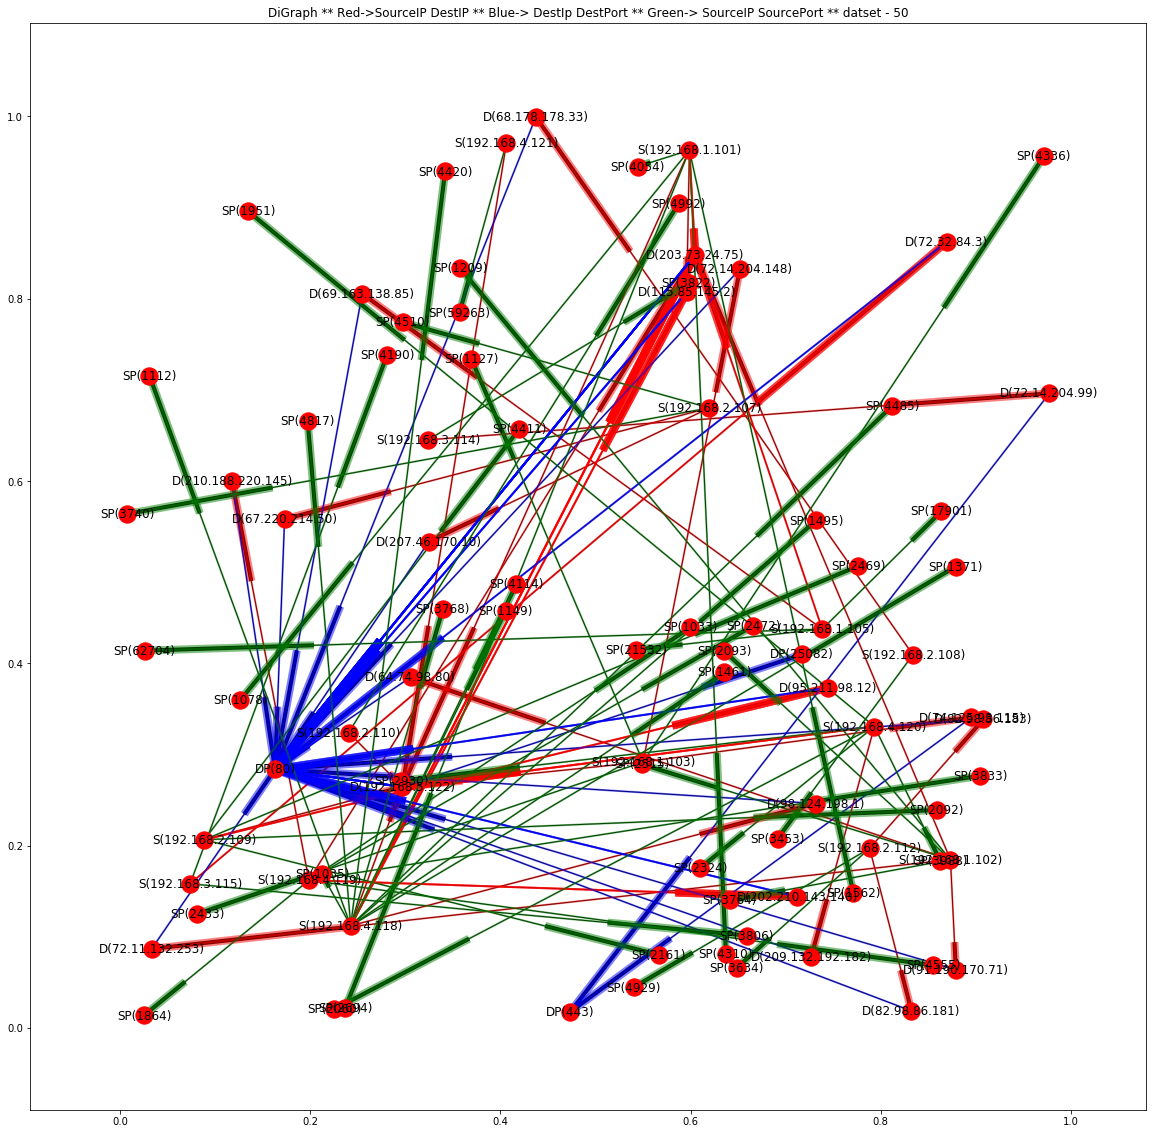

In [51]:
plt.close()
plt.figure(figsize=(20,20))
pos = nx.layout.random_layout(h)
#nx.draw_networkx(h, pos)
nx.draw_networkx(h,pos)
nx.draw_networkx_edges(h, pos, edgelist=l1, width=2, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(h, pos, edgelist=l2, width=2, alpha=0.5, edge_color='b')
nx.draw_networkx_edges(h, pos, edgelist=l3, width=2, alpha=0.5, edge_color='g')
plt.title("DiGraph ** Red->SourceIP DestIP ** Blue-> DestIp DestPort ** Green-> SourceIP SourcePort ** datset - 50")
plt.savefig("four.png")
plt.show(h)
plt.close()

###### writing weights

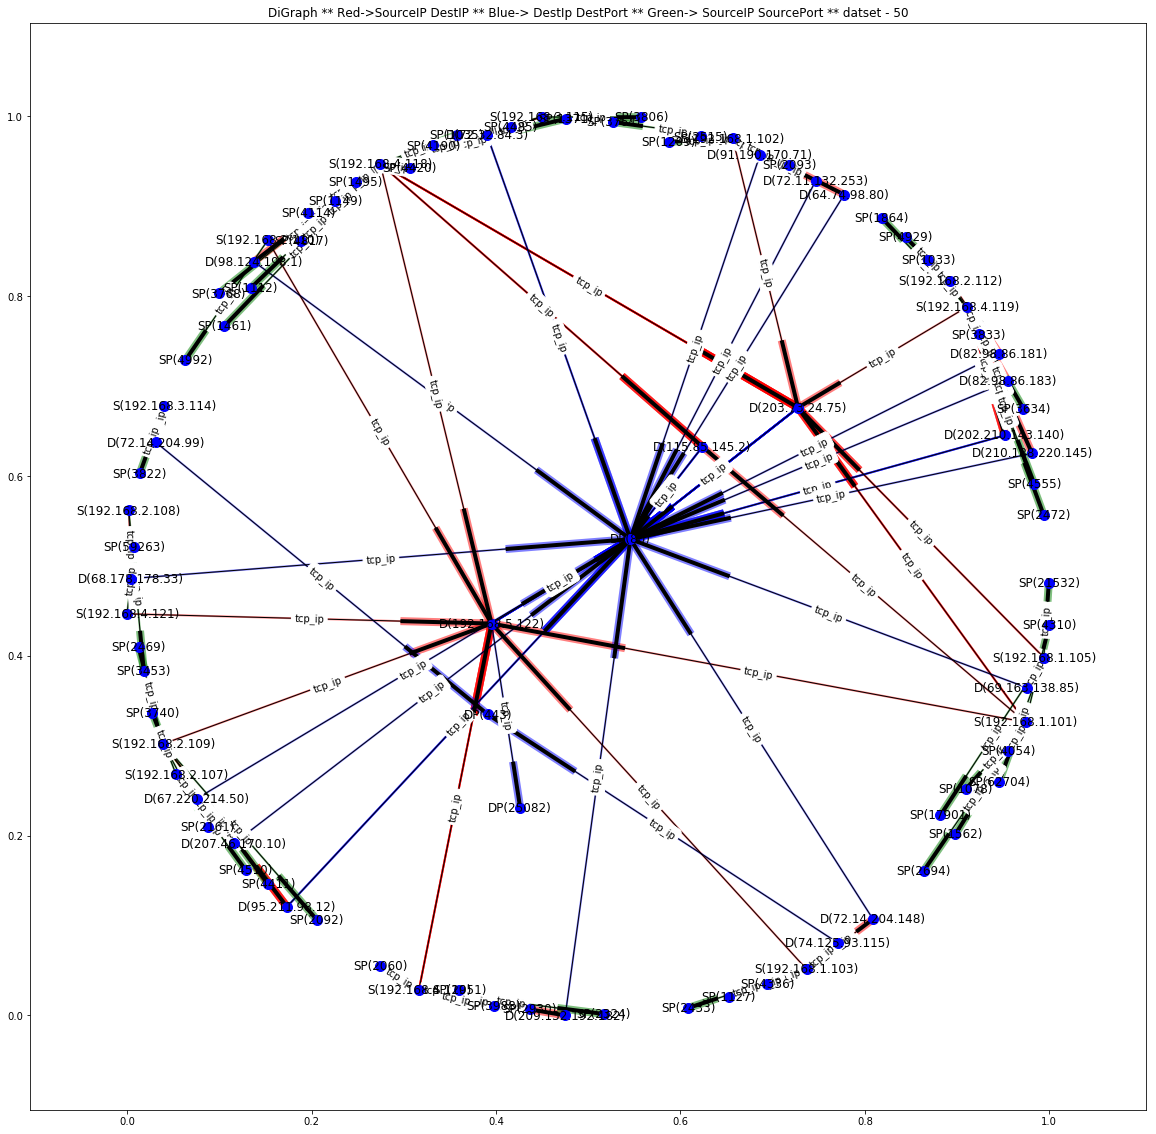

In [63]:
plt.close()
import networkx as nx
import pylab as plt
plt.figure(figsize=(20,20))
pos = nx.layout.fruchterman_reingold_layout(h)
#nx.draw_networkx(h, pos)
#nx.draw_networkx(h,pos)
nx.draw_networkx_edges(h, pos, edgelist=l1, width=2, alpha=0.5, edge_color='r')
nx.draw_networkx_edges(h, pos, edgelist=l2, width=2, alpha=0.5, edge_color='b')
nx.draw_networkx_edges(h, pos, edgelist=l3, width=2, alpha=0.5, edge_color='g')
d = {}
c = 0
for ix  in edge_labels:
    d[ix] = df_new['protocolName'][c]
    c+=1
nx.draw_networkx_edge_labels(h, pos, edge_labels = d)
nx.draw_networkx(h, pos,arrows=True,node_color='blue',node_size=100)
plt.title("DiGraph ** Red->SourceIP DestIP ** Blue-> DestIp DestPort ** Green-> SourceIP SourcePort ** datset - 50")
plt.savefig("five.png")
plt.show(h)
plt.close()

###### checking for syn

In [64]:
df_new['protocolName'].value_counts()

tcp_ip          421850
protocolName         2
Name: protocolName, dtype: int64

In [65]:
df_new = df_new[df_new.protocolName != 'protocolName']

In [66]:
df_new['protocolName'].value_counts()

tcp_ip    421850
Name: protocolName, dtype: int64

In [67]:
df_new = df_new.reset_index(drop=True)

In [141]:
import datetime
dest = []
prev_ind = 0
source = []
destPort = []
sourcePort = []

for i in xrange(len(df_new)):
    #stop_time = datetime.datetime.strptime(df_new['startDateTime'][i][-5:],'%M:%S')
    stop_time = df_new['startDateTime'][i][-2:]
    l = list(df_new['sourceTCPFlagsDescription'][i])
    if 'S' in l and 'A' not in l and len(l) > 0:
        if df_new['destination'][i] in dest:
#             if prev_dest is not None:
#                 prev_ind = dest.index(df_new['destination'][i],prev_ind)
            prev_ind = len(dest) - 1 - dest[::-1].index(df_new['destination'][i])
            #print prev_ind
            prev_dest = df_new['destination'][prev_ind]
            #start_time  = datetime.datetime.strptime(df_new['stopDateTime'][prev_ind][-5:],'%M:%S')
            start_time = df_new['stopDateTime'][prev_ind][-2:]
            #diff_time = stop_time.second - start_time.second
            diff_time = int(stop_time) - int(start_time)
            #print diff_time
            if diff_time<10 and diff_time>0:
                print df_new['source'][i]
                #print i, j        
                
                #print df_new['Tag'][i]
        dest.append(df_new['destination'][i])

print "done"      
#print dest

192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.109
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.16

192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.112
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.4.119
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.3.116
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.168.2.107
192.16